In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [95]:
netflix = pd.read_csv(r'C:\Users\yarde\Downloads\netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: >

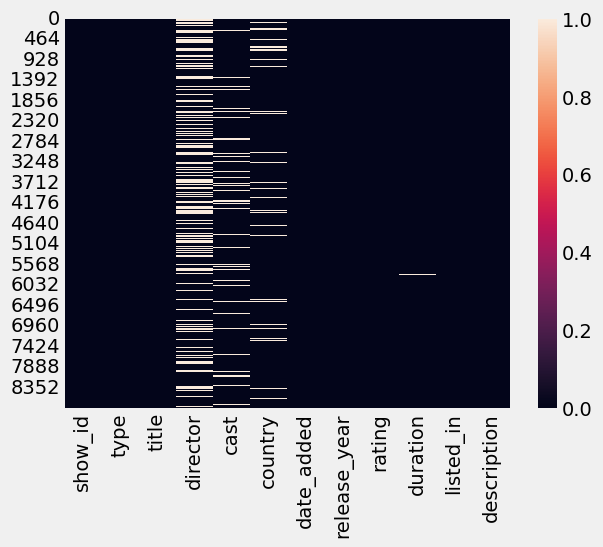

In [96]:
sns.heatmap(netflix.isnull())

In [97]:
netflix.dropna(subset=['rating','duration','date_added'],inplace =True)

In [132]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added        88
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [98]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6169 non-null   object
 4   cast          7965 non-null   object
 5   country       7961 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [138]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
# netflix['date_added']= netflix['date_added'].apply(pd.to_datetime)
netflix['loading_Year'] = netflix['date_added'].dt.year
netflix['loading_Year'] = netflix['loading_Year'].astype('Int64')
netflix['loading_Month']= netflix['date_added'].dt.month_name()

In [141]:
netflix['loading_Year'].value_counts().reset_index(name='count')

,loading_Year,count
0,2019,1999
1,2020,1878
2,2018,1624
3,2021,1498
4,2017,1161
5,2016,415
6,2015,73
7,2014,23
8,2011,13
9,2013,10


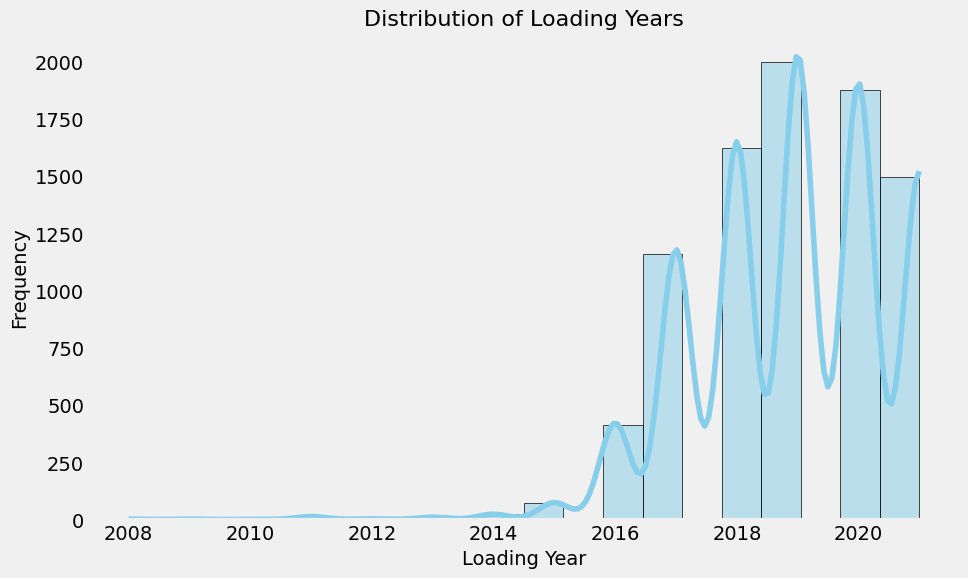

In [159]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix['loading_Year'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Loading Years', fontsize=16)
plt.xlabel('Loading Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(False)
plt.show()

C:\Users\yarde\AppData\Local\Temp\ipykernel_20220\1199140320.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




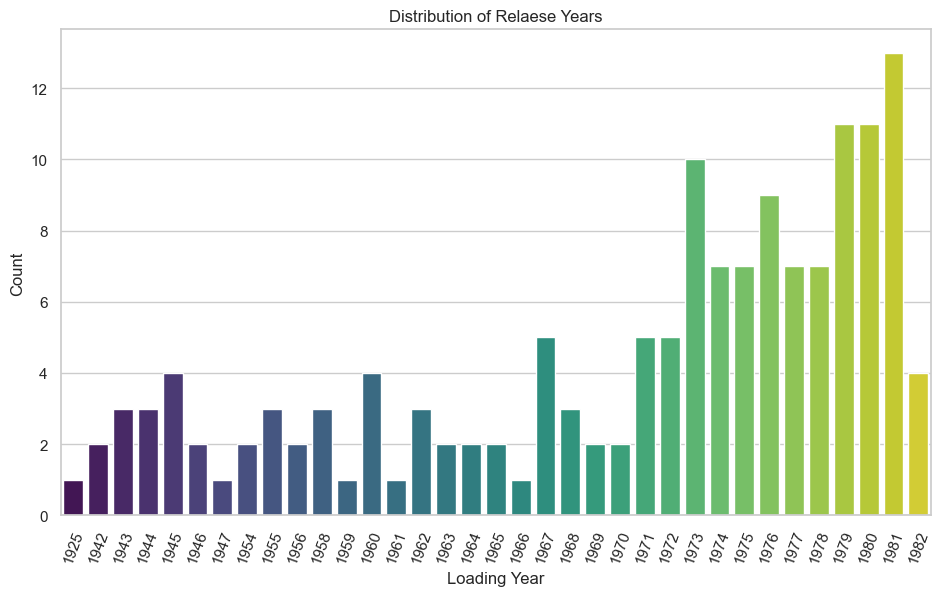

In [165]:
netflix_temp= netflix['release_year'].sort_values().head(150)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=netflix_temp, palette='viridis')
plt.xlabel('Loading Year')
plt.ylabel('Count')
plt.title('Distribution of Relaese Years')
plt.xticks(rotation=70)

plt.show()

In [100]:
types = netflix['type'].value_counts().reset_index()
types

,type,count
0,Movie,6126
1,TV Show,2664


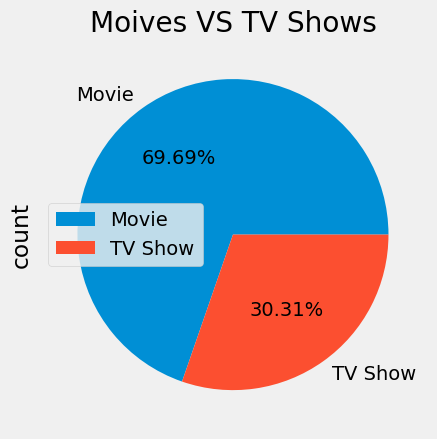

In [101]:
types.set_index('type', inplace=True)
types.plot.pie(y = 'count', autopct='%.2f%%', legend='type')
plt.title("Moives VS TV Shows")
plt.show()

In [168]:
directors = netflix['director'].value_counts().reset_index()
directors[:10]

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Jay Chapman,12
8,Youssef Chahine,12
9,Steven Spielberg,11


In [103]:
top_10_directors = netflix.groupby(['director', 'type'])['director'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_directors

director                type 
Rajiv Chilaka           Movie    19
Raúl Campos, Jan Suter  Movie    18
Suhas Kadav             Movie    16
Marcus Raboy            Movie    15
Jay Karas               Movie    14
Cathy Garcia-Molina     Movie    13
Jay Chapman             Movie    12
Youssef Chahine         Movie    12
Martin Scorsese         Movie    12
Steven Spielberg        Movie    11
Name: count, dtype: int64

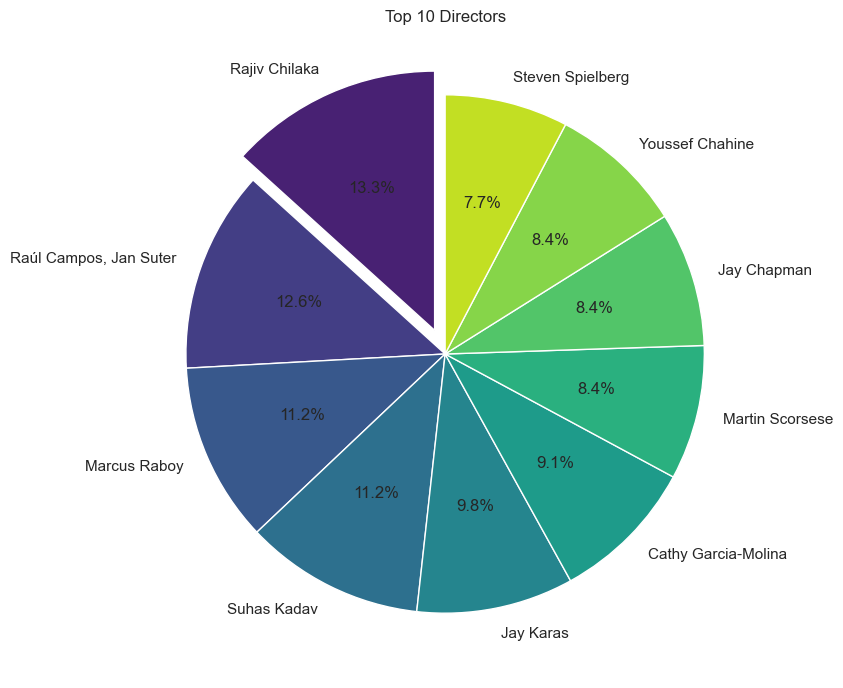

In [172]:
data = netflix['director'].value_counts()[:10].to_dict()
df = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])
explode = (0.1, 0, 0,0,0,0,0,0,0,0)
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Director'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', n_colors=10),explode=explode)
plt.title('Top 10 Directors')
plt.show()

In [175]:
netflix[(netflix['type']=='Movie')&(netflix['director']=='Rajiv Chilaka')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,loading_Year,loading_Month
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...,2021,July
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,2021,July
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,2021,July
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,2021,July
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...,2021,July
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...,2021,July
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ...",2021,July
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...,2021,July
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...,2021,July
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,...",2021,July


In [105]:
countries = netflix.groupby(['country', 'type'])['country'].value_counts().reset_index()
countries

,country,type,count
0,", France, Algeria",Movie,1
1,", South Korea",TV Show,1
2,Argentina,Movie,38
3,Argentina,TV Show,18
4,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
...,...,...,...
842,Venezuela,Movie,1
843,"Venezuela, Colombia",Movie,1
844,Vietnam,Movie,7
845,West Germany,Movie,1


In [106]:
top_10_countries = netflix.groupby(['country', 'type'])['country'].value_counts().sort_values(ascending = False).iloc[:10]
top_10_countries

country         type   
United States   Movie      2055
India           Movie       893
United States   TV Show     754
United Kingdom  TV Show     212
                Movie       206
Japan           TV Show     167
South Korea     TV Show     158
Canada          Movie       122
Spain           Movie        97
Egypt           Movie        92
Name: count, dtype: int64

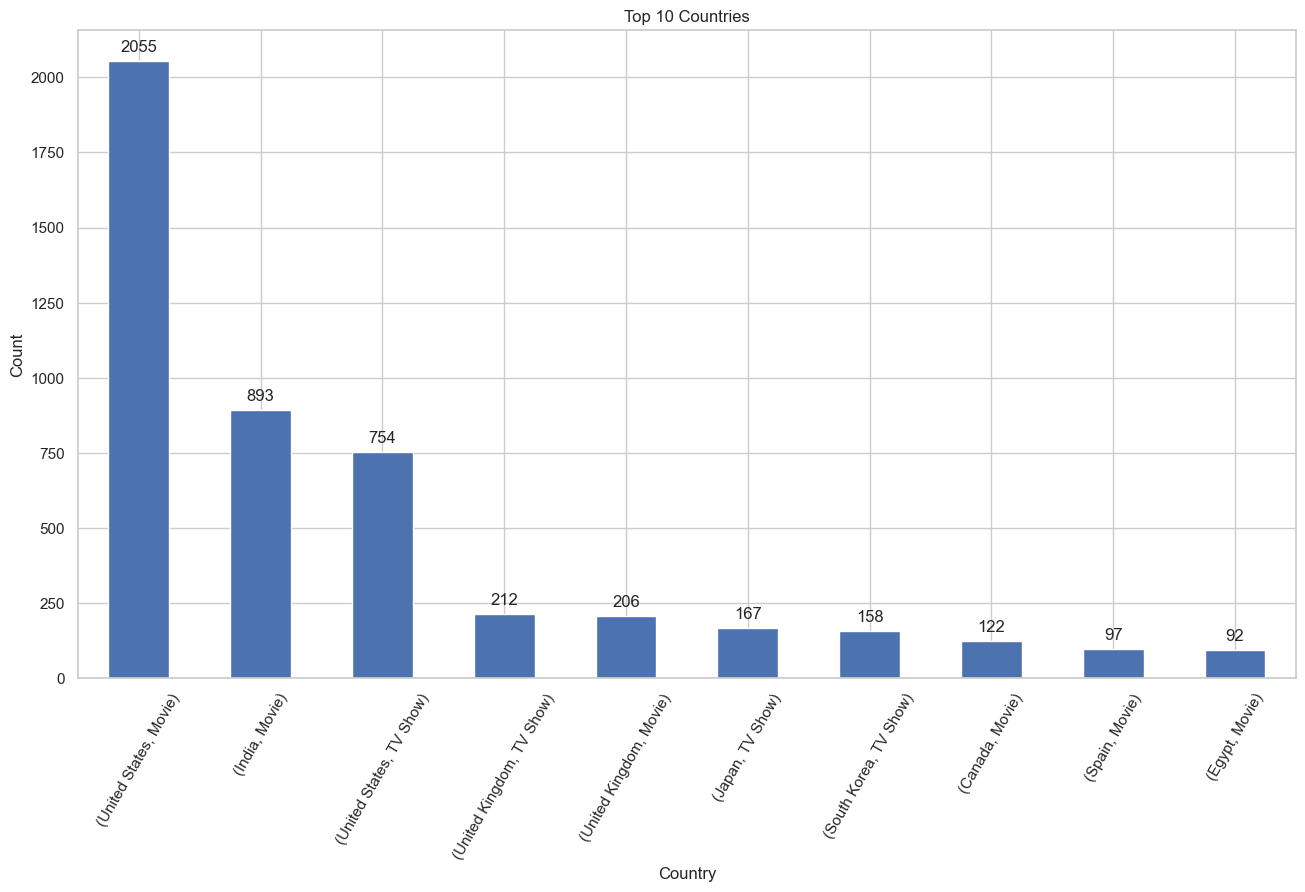

In [201]:
plt.figure(figsize=(14, 8))
ax = top_10_countries.plot(x='country', y='country', kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=60)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10),  # Vertical offset for the text
                textcoords='offset points', fontsize=12)

plt.show()

In [108]:
top_10_TV_Show_countries = countries[countries['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[:10]
top_10_TV_Show_countries

,country,type,count
686,United States,TV Show,754
581,United Kingdom,TV Show,212
362,Japan,TV Show,167
499,South Korea,TV Show,158
285,India,TV Show,79
554,Taiwan,TV Show,68
68,Canada,TV Show,59
185,France,TV Show,49
510,Spain,TV Show,48
18,Australia,TV Show,46


C:\Users\yarde\AppData\Local\Temp\ipykernel_20220\440866480.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




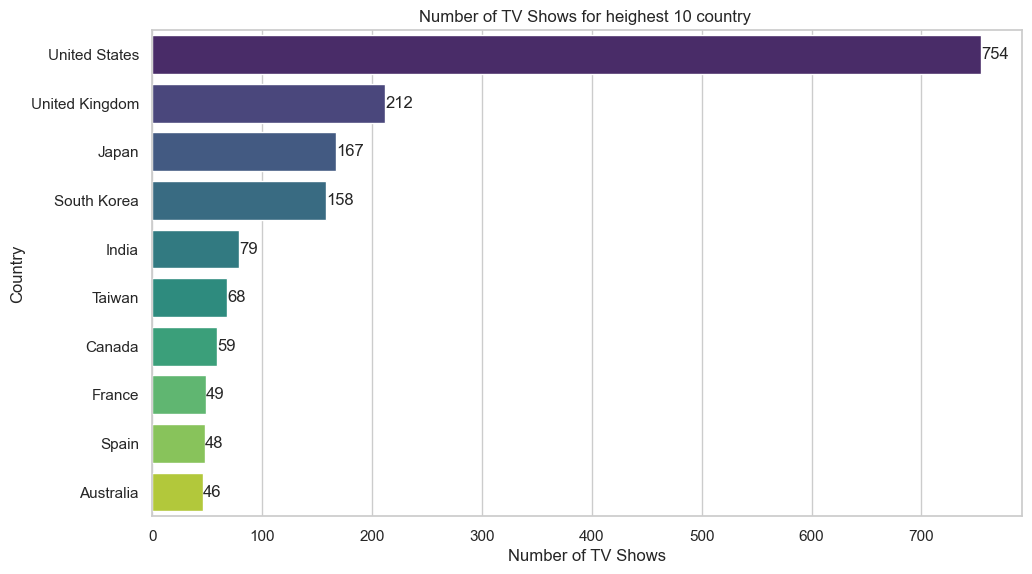

In [182]:
data = netflix[netflix['type']=='TV Show']['country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=data.values, y=data.index, palette='viridis')
plt.title('Number of TV Shows for heighest 10 country ')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')

for index, value in enumerate(data.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12)

plt.show()

In [109]:
top_10_movie_countries = countries[countries['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[:10]
top_10_movie_countries

,country,type,count
685,United States,Movie,2055
284,India,Movie,893
580,United Kingdom,Movie,206
67,Canada,Movie,122
509,Spain,Movie,97
171,Egypt,Movie,92
420,Nigeria,Movie,86
307,Indonesia,Movie,77
564,Turkey,Movie,76
361,Japan,Movie,76


In [110]:
release_years = netflix.groupby(['release_year', 'type'])['release_year'].value_counts().reset_index()
release_years

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


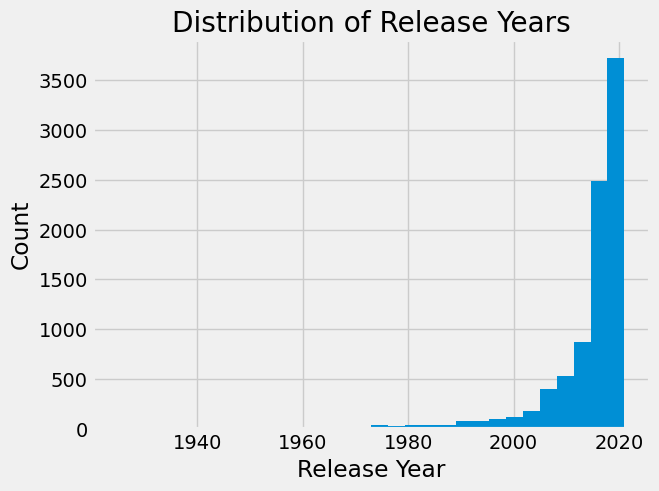

In [111]:
netflix['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [112]:
top_10_movies_years = release_years[release_years['type'] == 'Movie'].sort_values(by= 'count', ascending=False).iloc[:10]
top_10_movies_years

,release_year,type,count
111,2018,Movie,767
109,2017,Movie,765
107,2016,Movie,658
113,2019,Movie,633
115,2020,Movie,517
105,2015,Movie,396
117,2021,Movie,277
103,2014,Movie,264
101,2013,Movie,225
99,2012,Movie,173


In [113]:
ratings = netflix.groupby(['rating', 'type'])['type'].value_counts().reset_index()
ratings

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [114]:
top_10_movies_ratings = ratings[ratings['type'] == 'Movie'].sort_values(by= 'count',ascending=False).iloc[:10]
top_10_movies_ratings

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


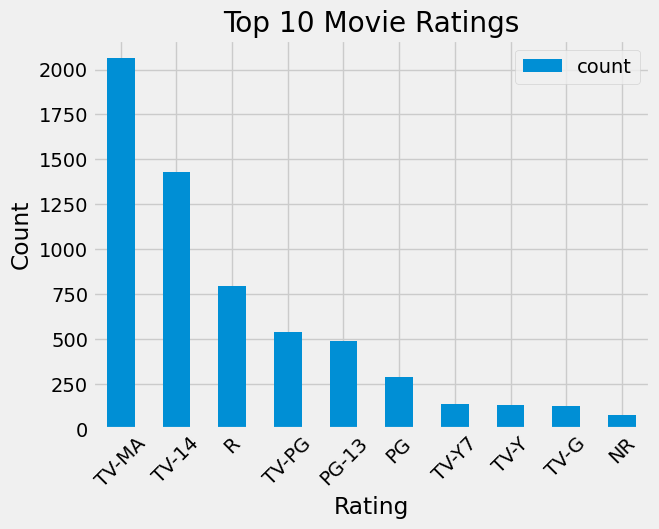

In [115]:
top_10_movies_ratings.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [116]:
top_10_TV_Show_ratings = ratings[ratings['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[:10]
top_10_TV_Show_ratings

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


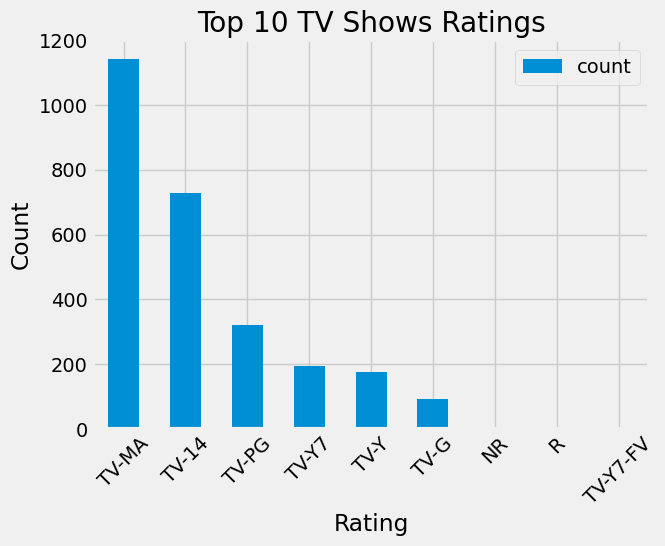

In [117]:
top_10_TV_Show_ratings.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 TV Shows Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

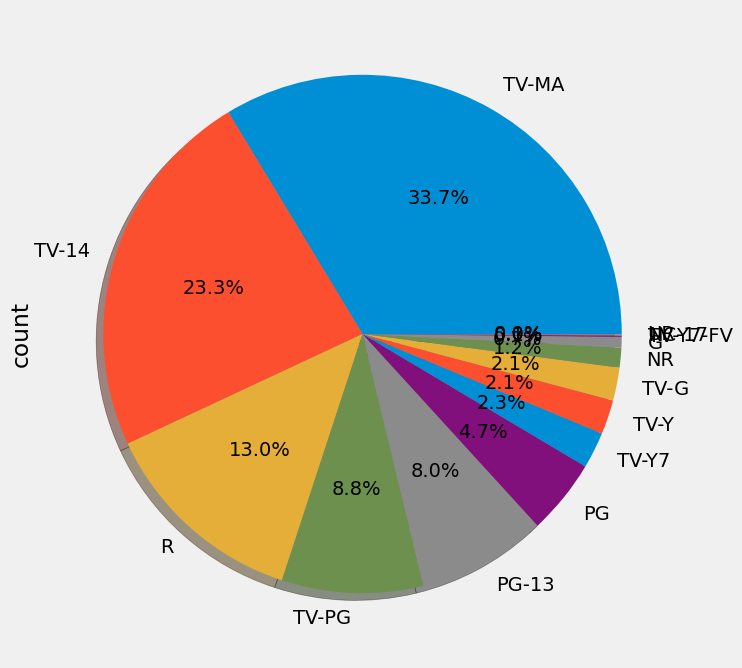

In [118]:
# Pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Add percentage labels to each wedge
    shadow=True,  # Add shadow effect to the pie chart
    figsize=(10, 8)  # Set the size of the figure
)
plt.show()

In [119]:
durations = netflix.groupby(['duration','type'])['duration'].value_counts().reset_index()
durations

,duration,type,count
0,1 Season,TV Show,1791
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [120]:
# Find the index of the row with the minimum duration
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

# Find the index of the row with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Get the corresponding release year and duration
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the minimum duration of 3 minutes was released in the year 2014.
The movie with the maximum duration of 312 minutes was released in the year 2018.


In [121]:
top_10_movie_durations = durations[durations['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_durations

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


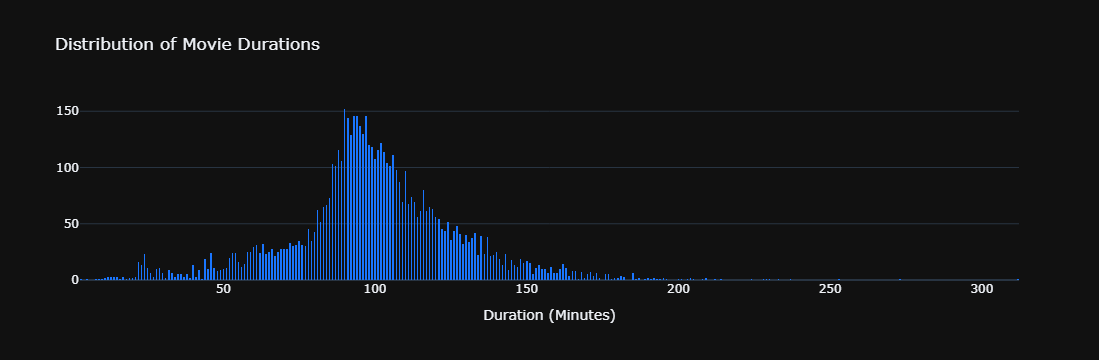

In [122]:
# Change the x data to movie['duration']
trace = go.Histogram(
    x=movie['duration'],  # Use movie duration for x-axis
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)')
)

layout = go.Layout(
    template="plotly_dark",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)')  # X-axis label
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [123]:
top_10_TV_Show_durations = durations[durations['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_durations

,duration,type,count
0,1 Season,TV Show,1791
110,2 Seasons,TV Show,421
138,3 Seasons,TV Show,198
151,4 Seasons,TV Show,94
162,5 Seasons,TV Show,64
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,6


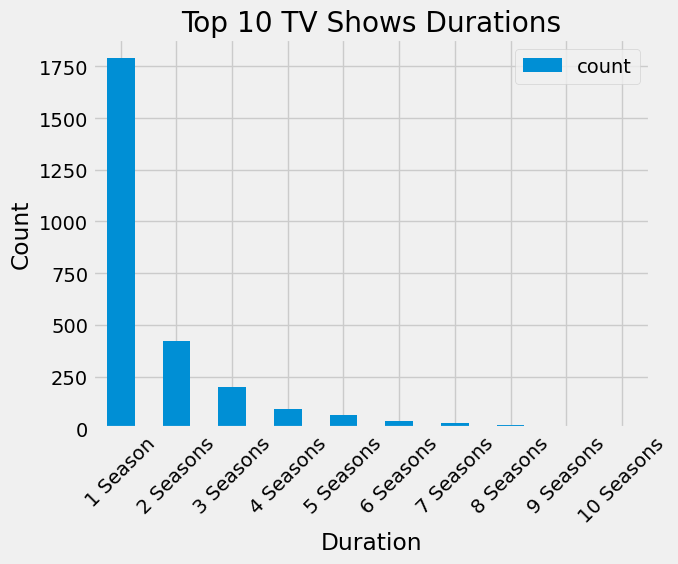

In [124]:
top_10_TV_Show_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 TV Shows Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [125]:
movie = netflix[netflix['type'] == 'Movie']
movie = movie.dropna(subset=['duration'])
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

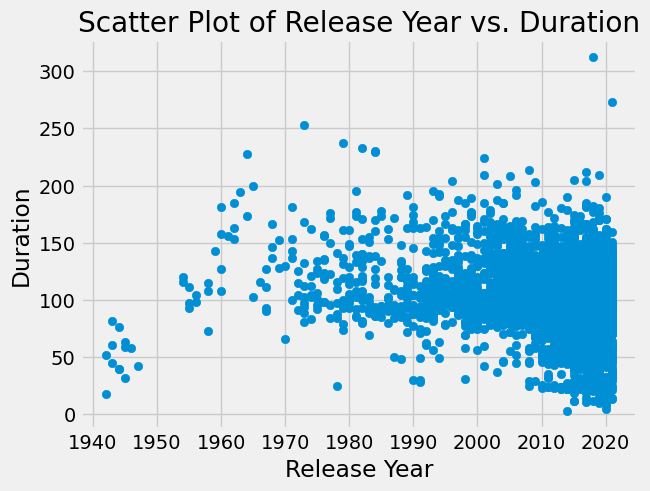

In [126]:
plt.scatter(movie['release_year'], movie['duration'])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

# Display the plot
plt.show()

In [127]:
listed_in = netflix.groupby(['listed_in', 'type'])['listed_in'].value_counts().reset_index()
listed_in

,listed_in,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [128]:
top_10_listed_in_movie = listed_in[listed_in['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[:10]
top_10_listed_in_movie

,listed_in,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


In [129]:
top_10_listed_in_TV_Show = listed_in[listed_in['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[:10]
top_10_listed_in_TV_Show

,listed_in,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,121
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


<>:2: SyntaxWarning:

invalid escape sequence '\w'

<>:2: SyntaxWarning:

invalid escape sequence '\w'

C:\Users\yarde\AppData\Local\Temp\ipykernel_20220\1512799624.py:2: SyntaxWarning:

invalid escape sequence '\w'



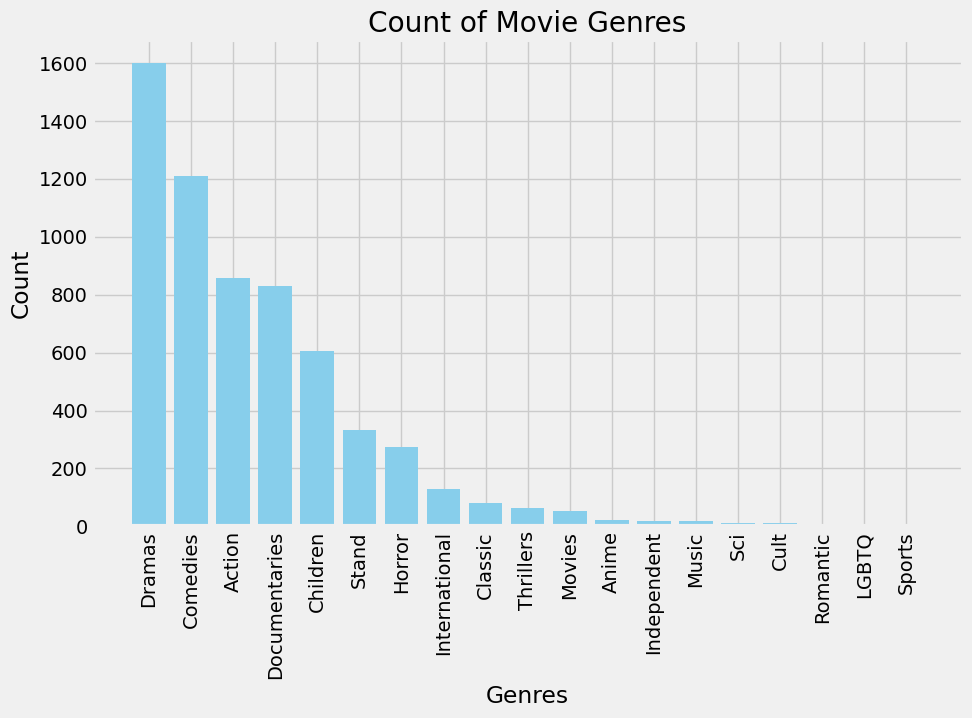

In [130]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

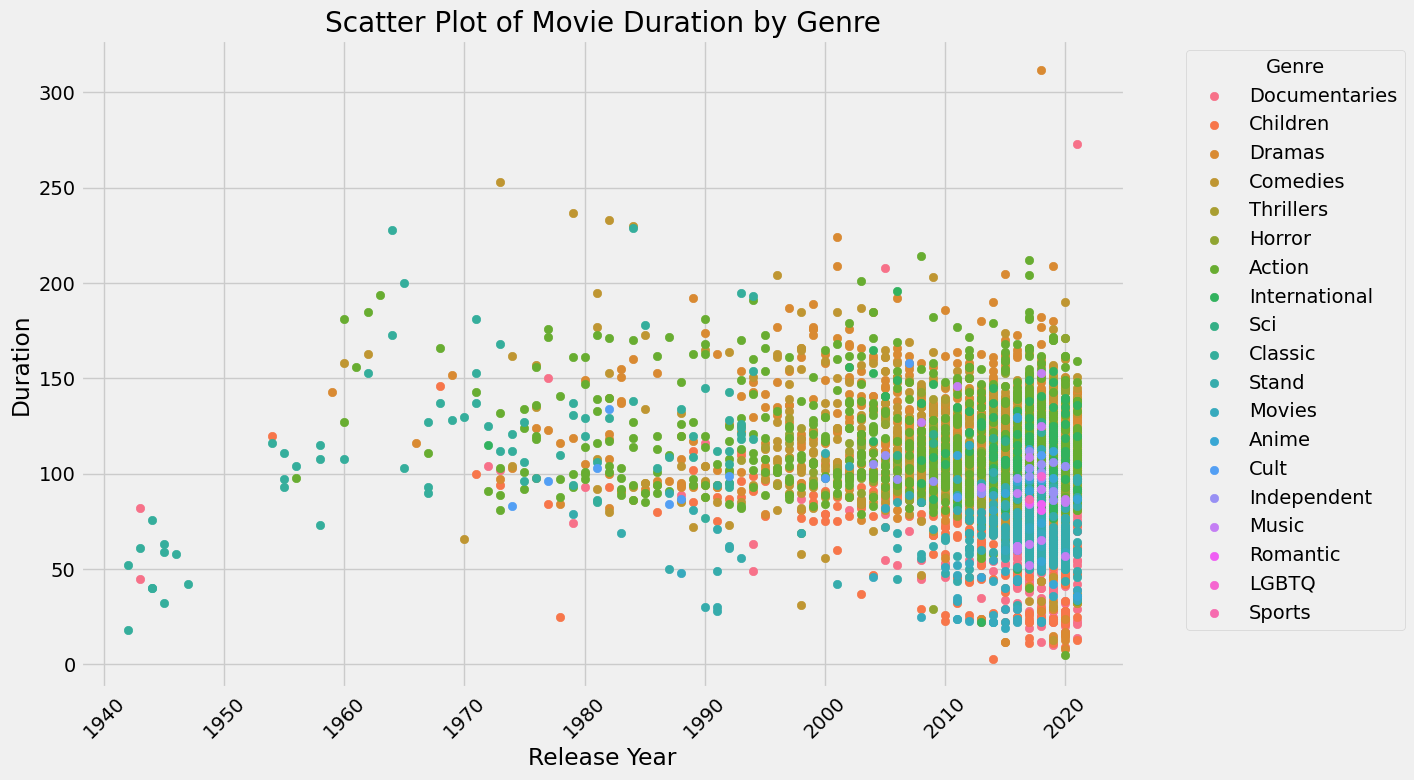

In [131]:
plt.style.use('fivethirtyeight')

# Color palette for each unique genre
palette = sns.color_palette("husl", len(movie['genres'].unique()))

# Scatter plot with different colors for each genre
plt.figure(figsize=(12, 8)) 
for i, genre in enumerate(movie['genres'].unique()):
    plt.scatter(movie['release_year'][movie['genres'] == genre], 
                movie['duration'][movie['genres'] == genre], 
                label=genre, 
                color=palette[i])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)
# Position the legend outside the plot area
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [207]:
df_filter = netflix[(netflix["release_year"] < 2020) & (netflix["release_year"] > 1900)]

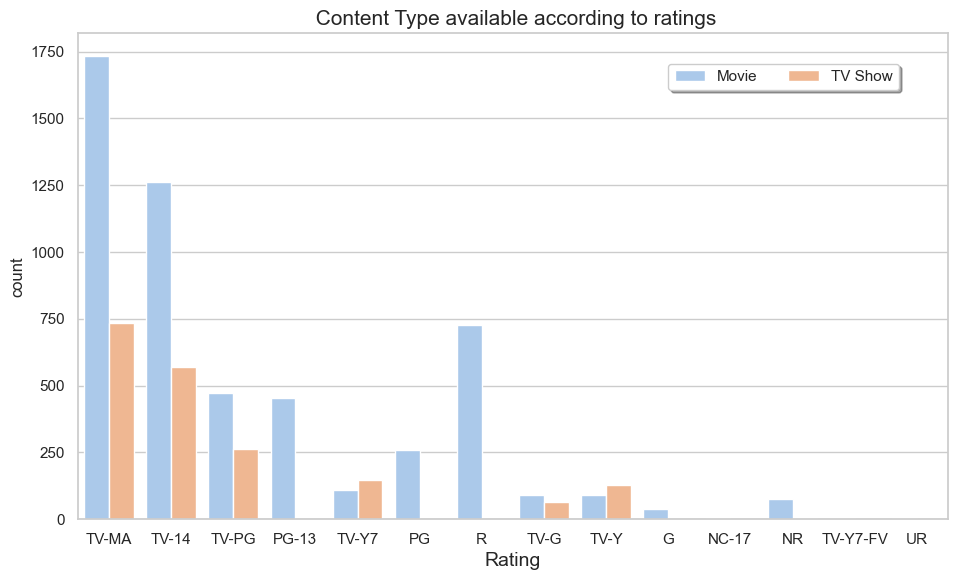

In [222]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df_filter, x='rating', hue='type', palette='pastel')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.670,0.91),
          ncol=3, fancybox=True, shadow=True)
plt.show()